### Imports

In [48]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw
import numpy as np
import shutil
from loguru import logger
import pandas as pd
from helpers import SplitterHelper
import seaborn as sns


plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('classic')
plt.subplots_adjust(wspace=0, hspace=0)
sns.set()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [2]:
# Checking labels
os.listdir('./dataset/lung_colon_image_set')

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

In [3]:
dataset_path = os.path.join(os.getcwd(), 'dataset', 'lung_colon_image_set')
# dataset_path

In [4]:
# Grouping dirs and labels
label_path = []
labels = []

for subdir, dirs, files in os.walk(dataset_path):
    for d in dirs:
        label_path.append(os.path.join(dataset_path, d))
        labels.append(d)

In [5]:
labels

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

In [8]:
# create a df, will make things more easier
DATASET = []
for idx, object in enumerate(labels):
            class_path = os.path.join(dataset_path, str(object))
            for img in os.listdir(class_path):
                DATASET.append((object, img))

# viewing a sample from the df
dataset_df = pd.DataFrame(DATASET, columns=['class', 'filename'])
dataset_df.sample(10)

,class,filename
21864,lung_scc,lungscc2677.jpeg
9732,colon_n,colonn758.jpeg
3004,colon_aca,colonca3702.jpeg
23250,lung_scc,lungscc3924.jpeg
22394,lung_scc,lungscc3153.jpeg
22896,lung_scc,lungscc3605.jpeg
9870,colon_n,colonn882.jpeg
6211,colon_n,colonn2089.jpeg
21947,lung_scc,lungscc2751.jpeg
379,colon_aca,colonca134.jpeg


In [7]:
# df summary ..
dataset_df.describe()

,class,filename
count,25000,25000
unique,5,25000
top,colon_aca,colonca1.jpeg
freq,5000,1


In [12]:
# checking if we have duplicate images file names, all good!  
len(dataset_df["filename"].unique())

25000

<AxesSubplot:>

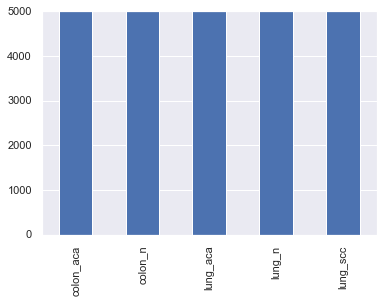

In [13]:
# balanced classes
dataset_df['class'].value_counts().plot(kind='bar')

### Visualizing Samples 

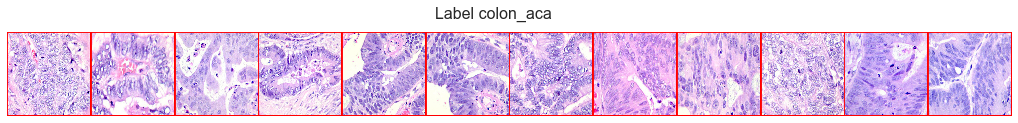

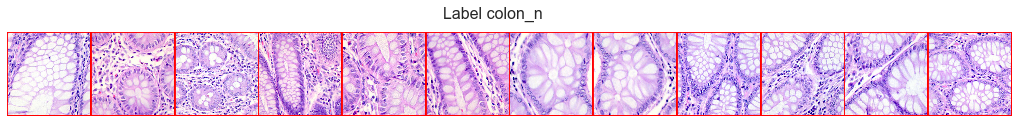

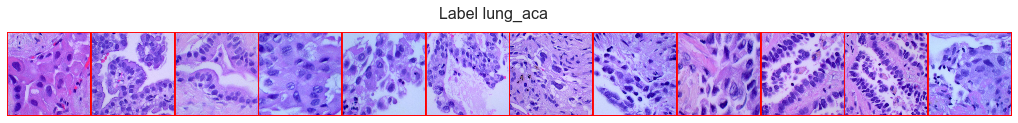

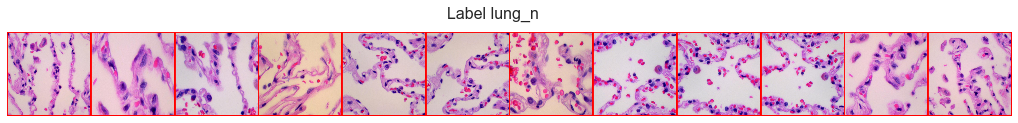

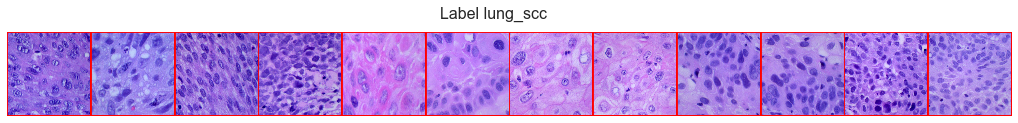

In [47]:
"""
# can visualize single label
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 6))
plt.subplots_adjust(wspace=0, hspace=0)
for i, j in enumerate(os.listdir(label_path[1])[:90]):
    fname = os.path.join(label_path[1], j)
    img = Image.open(fname)
    idcol = ImageDraw.Draw(img)
    idcol.rectangle(((0, 0), (95, 95)), outline='red')
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(np.array(img))
    fig.suptitle(f'Label {labels[1]}', fontsize=16)
    plt.axis('off')
"""
for idx, lbl in enumerate(labels):
    nrows, ncols = 1, 12
    fig, ax = plt.subplots(nrows, ncols, figsize=(18, 2))
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, j in enumerate(os.listdir(label_path[idx])[:ncols]):
        fname = os.path.join(label_path[idx], j)
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0, 0), (763, 763)), outline='red', width=5)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(np.array(img))
        fig.suptitle(f'Label {lbl}', fontsize=16)
        plt.axis('off')

### Dataset Splitting

In [271]:
splitted_dir = r'./dataset/splitted/'

# creating dirs if not exist
if not os.path.isdir(splitted_dir):
    os.mkdir(splitted_dir)
    
for chunk in ['train', 'val', 'test']:
    for idx, label in enumerate(labels):
        new_dir = os.path.join(splitted_dir, chunk, label)
        if not os.path.isdir(new_dir):
            os.makedirs(new_dir)
            
TRAIN_DIR = os.path.join(splitted_dir, 'train').replace('\\', '/')
VALID_DIR = os.path.join(splitted_dir, 'val').replace('\\', '/')
TEST_DIR = os.path.join(splitted_dir, 'test').replace('\\', '/')

os.path.isdir(TRAIN_DIR) # Must be true, simple validation that directories created/exists

True

In [273]:
# Copying data to train, test, and val
SplitterHelper(df=dataset_df, classes=labels, DATASET_PATH=dataset_path, TRAIN_DIR=TRAIN_DIR, VALID_DIR=VALID_DIR, TEST_DIR= TEST_DIR)

2022-06-08 14:23:30.815 | INFO     | helpers:SplitterHelper:23 - Finish Moving 3000 Train Image(s) from class colon_aca
2022-06-08 14:23:33.837 | INFO     | helpers:SplitterHelper:34 - Finish Moving 1000 Validation Image(s) from class colon_aca
2022-06-08 14:23:36.680 | INFO     | helpers:SplitterHelper:45 - Finish Moving 1000 Test Image(s) from class colon_aca
2022-06-08 14:23:45.500 | INFO     | helpers:SplitterHelper:23 - Finish Moving 3000 Train Image(s) from class colon_n
2022-06-08 14:23:48.387 | INFO     | helpers:SplitterHelper:34 - Finish Moving 1000 Validation Image(s) from class colon_n
2022-06-08 14:23:51.198 | INFO     | helpers:SplitterHelper:45 - Finish Moving 1000 Test Image(s) from class colon_n
2022-06-08 14:23:59.806 | INFO     | helpers:SplitterHelper:23 - Finish Moving 3000 Train Image(s) from class lung_aca
2022-06-08 14:24:02.706 | INFO     | helpers:SplitterHelper:34 - Finish Moving 1000 Validation Image(s) from class lung_aca
2022-06-08 14:24:05.576 | INFO     

### Conclusion?

1. Multi-class dataset, consists of 5 different labels (classes). 
2. Dataset balanced (5k images/label), total 25k images.
3. Can be handled using multi-class image classification task problem type.
4. Data are clean, no duplicates and no nulls.
5. 